In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the requests library.
import requests

# Import the datetime module from the datetime library.
from datetime import datetime

# Weather API Key
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Create URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=eec9a707f9a779d5b6765c629d18cc50


In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

627

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | portland
Processing Record 2 of Set 1 | kruisfontein
Processing Record 3 of Set 1 | cheney
Processing Record 4 of Set 1 | miles city
Processing Record 5 of Set 1 | cidreira
Processing Record 6 of Set 1 | kapaa
Processing Record 7 of Set 1 | nikolskoye
Processing Record 8 of Set 1 | sagua la grande
Processing Record 9 of Set 1 | eucaliptus
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | christchurch
Processing Record 13 of Set 1 | bengkulu
Processing Record 14 of Set 1 | lebu
Processing Record 15 of Set 1 | chuy
Processing Record 16 of Set 1 | te anau
Processing Record 17 of Set 1 | nouadhibou
Processing Record 18 of Set 1 | sitka
Processing Record 19 of Set 1 | pisco
Processing Record 20 of Set 1 | bambous virieux
Processing Record 21 of Set 1 | dikson
Processing Record 22 of Set 1 | port elizabeth
Processing Record 23 of Set 1 | sh

Processing Record 35 of Set 4 | campos novos
Processing Record 36 of Set 4 | qaanaaq
Processing Record 37 of Set 4 | moron
Processing Record 38 of Set 4 | talnakh
Processing Record 39 of Set 4 | sorland
Processing Record 40 of Set 4 | alice springs
Processing Record 41 of Set 4 | abonnema
Processing Record 42 of Set 4 | kahului
Processing Record 43 of Set 4 | kompaniyivka
Processing Record 44 of Set 4 | carlos barbosa
Processing Record 45 of Set 4 | yafran
Processing Record 46 of Set 4 | grants pass
Processing Record 47 of Set 4 | meulaboh
Processing Record 48 of Set 4 | namwala
Processing Record 49 of Set 4 | zhangye
Processing Record 50 of Set 4 | fare
Processing Record 1 of Set 5 | forestville
Processing Record 2 of Set 5 | severo-kurilsk
Processing Record 3 of Set 5 | tuatapere
Processing Record 4 of Set 5 | provideniya
Processing Record 5 of Set 5 | skalistyy
City not found. Skipping...
Processing Record 6 of Set 5 | la maddalena
Processing Record 7 of Set 5 | khatanga
Processing 

Processing Record 23 of Set 8 | vostok
Processing Record 24 of Set 8 | duverge
Processing Record 25 of Set 8 | llanes
Processing Record 26 of Set 8 | westport
Processing Record 27 of Set 8 | massaguet
Processing Record 28 of Set 8 | vila franca do campo
Processing Record 29 of Set 8 | okandja
City not found. Skipping...
Processing Record 30 of Set 8 | klyuchi
Processing Record 31 of Set 8 | mingaora
Processing Record 32 of Set 8 | santa isabel do rio negro
Processing Record 33 of Set 8 | aklavik
Processing Record 34 of Set 8 | saint george
Processing Record 35 of Set 8 | poquoson
Processing Record 36 of Set 8 | ahumada
City not found. Skipping...
Processing Record 37 of Set 8 | mergui
City not found. Skipping...
Processing Record 38 of Set 8 | shahpura
Processing Record 39 of Set 8 | stromness
Processing Record 40 of Set 8 | acari
Processing Record 41 of Set 8 | geraldton
Processing Record 42 of Set 8 | giyani
Processing Record 43 of Set 8 | kassala
Processing Record 44 of Set 8 | lolu

Processing Record 7 of Set 12 | tucuman
Processing Record 8 of Set 12 | svobodnyy
Processing Record 9 of Set 12 | menongue
Processing Record 10 of Set 12 | mahon
Processing Record 11 of Set 12 | vikhorevka
Processing Record 12 of Set 12 | kobojango
City not found. Skipping...
Processing Record 13 of Set 12 | qingdao
Processing Record 14 of Set 12 | sarila
Processing Record 15 of Set 12 | corpus christi
Processing Record 16 of Set 12 | sumenep
Processing Record 17 of Set 12 | shirdi
Processing Record 18 of Set 12 | varhaug
Processing Record 19 of Set 12 | orlik
Processing Record 20 of Set 12 | puerto del rosario
Processing Record 21 of Set 12 | mufumbwe
Processing Record 22 of Set 12 | richards bay
Processing Record 23 of Set 12 | coihaique
Processing Record 24 of Set 12 | springbok
Processing Record 25 of Set 12 | wellington
Processing Record 26 of Set 12 | cabo rojo
Processing Record 27 of Set 12 | harper
Processing Record 28 of Set 12 | ketchikan
Processing Record 29 of Set 12 | kunm

In [7]:
len(city_data)

568

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Portland,45.5234,-122.6762,48.20,53,90,9.22,US,2021-04-10 05:03:47
1,Kruisfontein,-34.0033,24.7314,57.45,77,47,2.71,ZA,2021-04-10 05:07:23
2,Cheney,47.4874,-117.5758,48.20,37,90,8.05,US,2021-04-10 05:06:25
3,Miles City,46.4083,-105.8406,37.40,52,1,10.36,US,2021-04-10 05:07:23
4,Cidreira,-30.1811,-50.2056,73.38,80,85,8.01,BR,2021-04-10 05:07:23
5,Kapaa,22.0752,-159.3190,71.60,73,90,8.05,US,2021-04-10 05:07:24
6,Nikolskoye,59.7035,30.7861,43.00,65,40,15.66,RU,2021-04-10 05:07:24
7,Sagua La Grande,22.8067,-80.0756,71.60,88,20,5.75,CU,2021-04-10 05:07:24
8,Eucaliptus,-17.5833,-67.5167,47.73,74,85,6.38,BO,2021-04-10 05:07:24
9,Busselton,-33.6500,115.3333,73.00,53,0,8.99,AU,2021-04-10 05:07:25


In [9]:
# Re-order columns
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Portland,US,2021-04-10 05:03:47,45.5234,-122.6762,48.20,53,90,9.22
1,Kruisfontein,ZA,2021-04-10 05:07:23,-34.0033,24.7314,57.45,77,47,2.71
2,Cheney,US,2021-04-10 05:06:25,47.4874,-117.5758,48.20,37,90,8.05
3,Miles City,US,2021-04-10 05:07:23,46.4083,-105.8406,37.40,52,1,10.36
4,Cidreira,BR,2021-04-10 05:07:23,-30.1811,-50.2056,73.38,80,85,8.01
5,Kapaa,US,2021-04-10 05:07:24,22.0752,-159.3190,71.60,73,90,8.05
6,Nikolskoye,RU,2021-04-10 05:07:24,59.7035,30.7861,43.00,65,40,15.66
7,Sagua La Grande,CU,2021-04-10 05:07:24,22.8067,-80.0756,71.60,88,20,5.75
8,Eucaliptus,BO,2021-04-10 05:07:24,-17.5833,-67.5167,47.73,74,85,6.38
9,Busselton,AU,2021-04-10 05:07:25,-33.6500,115.3333,73.00,53,0,8.99


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

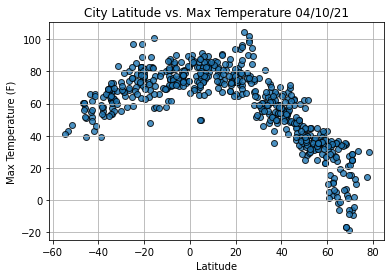

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

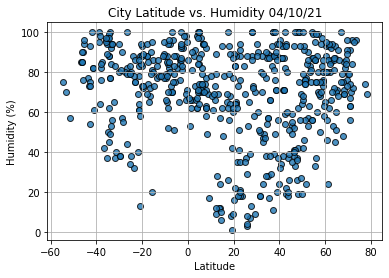

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

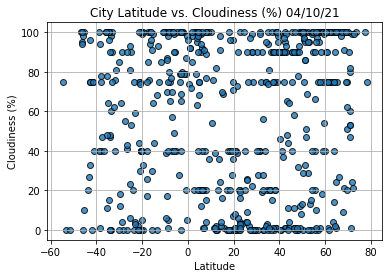

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

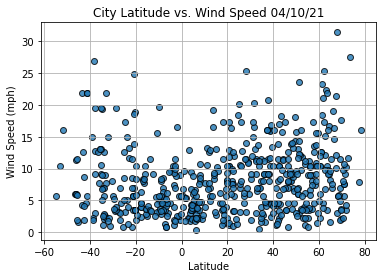

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [16]:
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [17]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

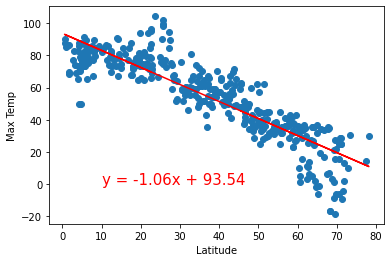

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,0))

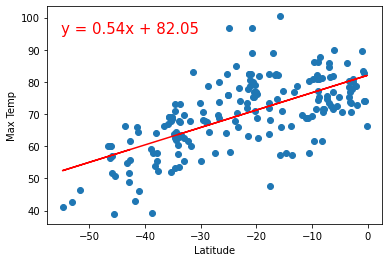

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-55,95))

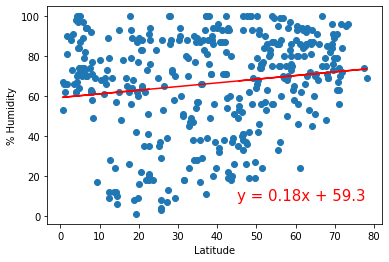

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(45,8))

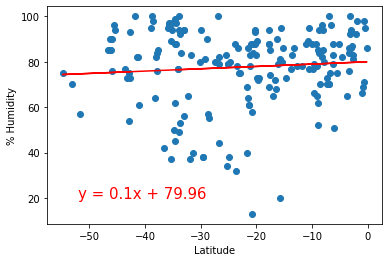

In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-52,20))

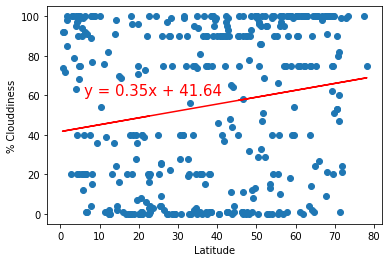

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Clouddiness',(6,60))

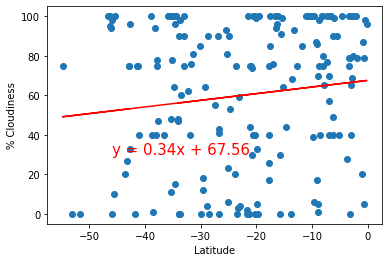

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-46,30))

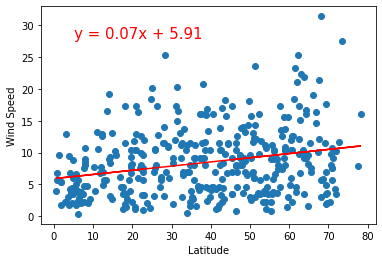

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(5,28))

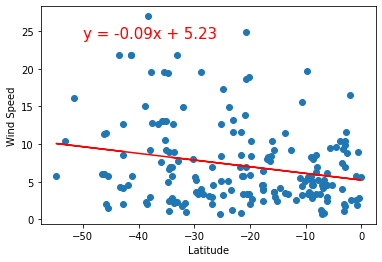

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,24))